# Categorization Problem (using server computer factors)

If we double the size of the world (but not the organism), does the organism mass:
* stay the same (organism is stable and alive)
* go up by 2 (organism is infinite in one dimension)
* go up by 2^2 = 4? (organism is infinite in two dimensions)

In [270]:
!scp -i /Users/stanley/Desktop/2022.pem ec2-user@ec2-54-159-139-120.compute-1.amazonaws.com:~/math36project/server4/server11-6-22/data_gaussian.npy /Users/stanley/Dropbox\ \(Dartmouth\ College\)/22F/MATH36/FINAL_PROJECT/server3/data_gaussian.npy

data_gaussian.npy                             100% 5860KB  14.5MB/s   00:00    


In [271]:
!scp -i /Users/stanley/Desktop/2022.pem ec2-user@ec2-54-159-139-120.compute-1.amazonaws.com:~/math36project/server4/server11-6-22/data_rectangular.npy /Users/stanley/Dropbox\ \(Dartmouth\ College\)/22F/MATH36/FINAL_PROJECT/server3/data_rectangular.npy

data_rectangular.npy                          100% 3750KB  10.5MB/s   00:00    


In [272]:
# from lenia import Lenia

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib import animation
from IPython.display import HTML
from ipywidgets import interact

# analysis

In [273]:
FILENAME = 'data_gaussian.npy'

In [274]:
# load
d = np.load(FILENAME)

# clean up uncalculated factors
mask = (d[:,2] != -1)
d = d[mask, :]

# filter out all factors > 4 to be 4
d[d > 4] = 4

y=d[:,0]
x=d[:,1]
z=d[:,2]

print("points:", len(z))

points: 30997


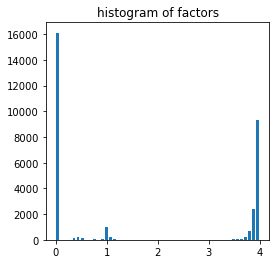

In [275]:
# set up plot
fig, ax = plt.subplots()

hist, bins = np.histogram(z, bins=50)
center = (bins[:-1] + bins[1:]) / 2
width = 0.7 * (bins[1] - bins[0])

ax.bar(center, hist, align='center', width=width)

plt.title("histogram of factors")

fig.set_size_inches(4, 4)
fig.patch.set_facecolor('white')
# display(fig)

'\n# set up plot\nfig = plt.figure()\nax = plt.axes(projection=\'3d\')\n\nax.plot_trisurf(y, x, z, cmap=\'viridis\', edgecolor=\'none\')\n\nplt.title("3d wireframe mu-sigma-factor")\n\nfig.set_size_inches(8, 8)\nfig.patch.set_facecolor(\'white\')\n# display(fig)\n'

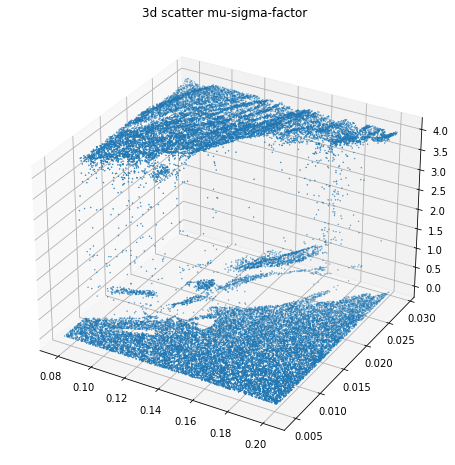

In [276]:
from mpl_toolkits import mplot3d

# set up plot
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(y, x, z, cmap='viridis', linewidth=0.5, s=1)

plt.title("3d scatter mu-sigma-factor")

fig.set_size_inches(8, 8)
fig.patch.set_facecolor('white')
# display(fig)

"""
# set up plot
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_trisurf(y, x, z, cmap='viridis', edgecolor='none')

plt.title("3d wireframe mu-sigma-factor")

fig.set_size_inches(8, 8)
fig.patch.set_facecolor('white')
# display(fig)
"""

## sorting data

In [277]:
d_copy = d.copy()

In [278]:
np.sort(d_copy, 0)

array([[0.078  , 0.00448, 0.     ],
       [0.078  , 0.00448, 0.     ],
       [0.078  , 0.00448, 0.     ],
       ...,
       [0.2028 , 0.02912, 4.     ],
       [0.2028 , 0.02912, 4.     ],
       [0.2028 , 0.02912, 4.     ]])

In [279]:
rows = np.where(d_copy[:,2] <= 0.5)
zeros = d_copy[rows]

d_copy = d_copy[d_copy[:,2] > 0.5]

In [280]:
np.sort(d_copy, 0)

array([[0.078     , 0.0070477 , 0.50073947],
       [0.078     , 0.00714645, 0.50087038],
       [0.078     , 0.00729459, 0.50106835],
       ...,
       [0.2025499 , 0.02912   , 4.        ],
       [0.2028    , 0.02912   , 4.        ],
       [0.2028    , 0.02912   , 4.        ]])

In [281]:
rows = np.where(d_copy[:,2] <= 1.5)
ones = d_copy[rows]

d_copy = d_copy[d_copy[:,2] > 1.5]

In [282]:
np.sort(d_copy, 0)

array([[0.078     , 0.00714645, 1.50902803],
       [0.078     , 0.00754148, 1.50957688],
       [0.078     , 0.00768962, 1.51511981],
       ...,
       [0.2025499 , 0.02912   , 4.        ],
       [0.2028    , 0.02912   , 4.        ],
       [0.2028    , 0.02912   , 4.        ]])

In [283]:
rows = np.where(d_copy[:,2] <= 3)
twos = d_copy[rows]

d_copy = d_copy[d_copy[:,2] > 3]

In [284]:
np.sort(d_copy, 0)

array([[0.078     , 0.00714645, 3.00775498],
       [0.078     , 0.00754148, 3.0272998 ],
       [0.078     , 0.00768962, 3.06101109],
       ...,
       [0.2025499 , 0.02912   , 4.        ],
       [0.2028    , 0.02912   , 4.        ],
       [0.2028    , 0.02912   , 4.        ]])

In [285]:
rows = np.where(d_copy[:,2] > 3)
fours = d_copy[rows]

d_copy = d_copy[d_copy[:,2] <= 3]

In [286]:
np.sort(d_copy, 0)

array([], shape=(0, 3), dtype=float64)

In [287]:
y_zeros = zeros[:,0]; x_zeros = zeros[:,1]
y_ones = ones[:,0]; x_ones = ones[:,1]
y_twos = twos[:,0]; x_twos = twos[:,1]
y_fours = fours[:,0]; x_fours = fours[:,1]

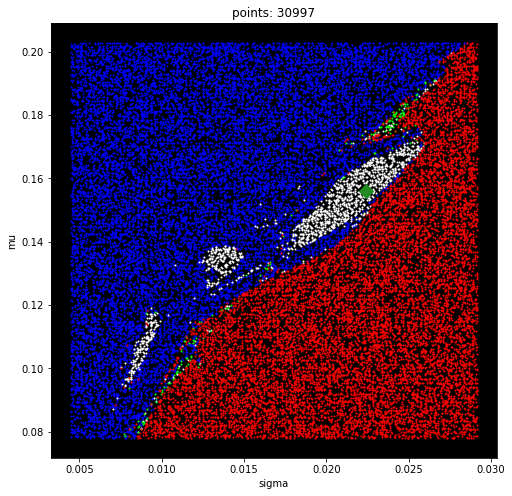

In [288]:
# set up plot
fig = plt.figure()
ax = plt.axes()

dotsize = 1

ax.scatter(x_zeros, y_zeros, c='blue', s=dotsize)
ax.scatter(x_ones, y_ones, c='white', s=dotsize)
ax.scatter(x_twos, y_twos, c='lime', s=dotsize)
ax.scatter(x_fours, y_fours, c='red', s=dotsize)
ax.scatter(0.0224, 0.156, c='forestgreen', s=100, marker='D')

ax.set_xlabel("sigma")
ax.set_ylabel("mu")

plt.title(f"points: {len(z)}")

fig.set

fig.set_size_inches(8, 8)
ax.set_facecolor("black")
fig.patch.set_facecolor('white')
# display(fig)